In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)
ride_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [5]:
city_data_df.count()

city_data_df.isnull().sum()
city_data_df.dtypes

# Get the unique values of the type of city.

# sum( == "urban")

city_data_df["type"].unique()
print(sum(city_data_df["type"] == "Suburban"))

print(sum(city_data_df["type"] == "Rural"))

36
18


In [6]:
ride_data_df.count()
ride_data_df.isnull().sum()
ride_data_df.dtypes

len(ride_data_df["city"].unique())


120

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"], sort=True)

# Display the DataFrame
pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
2,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
3,Amandaburgh,2019-01-11 02:22:07,29.24,7279902884763,12,Urban
4,Amandaburgh,2019-01-21 04:12:54,9.26,5528427024492,12,Urban


In [8]:
suburban_count = sum(city_data_df["type"] == "Suburban")
rural_count = sum(city_data_df["type"] == "Rural")
urban_count = sum(city_data_df["type"] == "Urban")


In [10]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2019-03-05 02:15:38,26.28,906850928986,12,Urban
1,Amandaburgh,2019-02-24 23:10:49,43.66,6573820412437,12,Urban
2,Amandaburgh,2019-02-10 20:42:46,36.17,6455620849753,12,Urban
3,Amandaburgh,2019-01-11 02:22:07,29.24,7279902884763,12,Urban
4,Amandaburgh,2019-01-21 04:12:54,9.26,5528427024492,12,Urban


In [14]:
# Create the Urban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
40,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
41,Barronchester,2019-05-05 04:03:11,30.38,2281522828169,11,Suburban
42,Barronchester,2019-04-25 19:11:43,36.13,2660177707065,11,Suburban
43,Barronchester,2019-03-31 06:05:30,44.24,1252888806772,11,Suburban
44,Barronchester,2019-03-02 23:36:58,36.49,4031573980778,11,Suburban


In [15]:
# Create the Urban city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
74,Bradshawfurt,2019-03-06 21:44:53,19.74,6080367372860,7,Rural
75,Bradshawfurt,2019-03-24 18:53:18,57.51,2301998876294,7,Rural
76,Bradshawfurt,2019-03-24 07:34:03,19.89,7867402022145,7,Rural
77,Bradshawfurt,2019-02-18 22:21:26,34.32,8881996813087,7,Rural
78,Bradshawfurt,2019-04-08 13:46:03,55.19,1742954306812,7,Rural


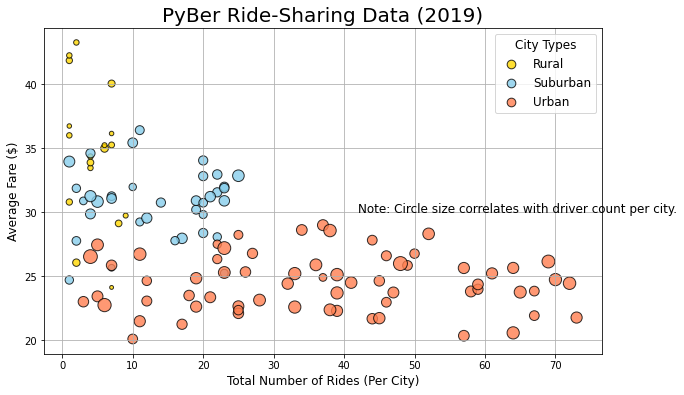

In [68]:
# The average fare for each type of city on the y-axis
# The total number of rides for each type of city on the x-axis
# Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city
# Here are the steps to create a bubble chart:

# To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
# To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
# To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.




# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head(20)


# Get the number of rides for Sub urban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head(20)


# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head(20)



# Get the number of rides for urban cities.
urban_ride_average = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_ride_average.head(20)


# Get the number of rides forSub urban cities.
suburban_ride_average = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_ride_average.head(20)


# Get the number of rides for Rural cities.
rural_ride_average = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_ride_average.head(20)


# Get the number of rides for urban cities.
urban_ride_driver_average = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_ride_driver_average.head(20)


# Get the number of rides forSub urban cities.
suburban_ride_driver_average = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_ride_driver_average.head(20)


# Get the number of rides for Rural cities.
rural_ride_driver_average = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_ride_driver_average.head(20)

plt.subplots(figsize=(10, 6))
plt.scatter(x= rural_ride_driver_average, y =rural_ride_average , s=rural_ride_count *5,
           c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.scatter(x= suburban_ride_driver_average, y =suburban_ride_average , s=suburban_ride_count *5,
           c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.scatter(x= urban_ride_driver_average, y =urban_ride_average, s= urban_ride_count *5,
            c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")



#  Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


# Incorporate a text label about circle size.
plt.text(42, 30, "Note: Circle size correlates with driver count per city.", fontsize="12")


# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()



<Figure size 432x288 with 0 Axes>